<a href="https://colab.research.google.com/github/elugabriel/Data-Science-Full-Course/blob/main/Module_7_Statistics_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics in Data Science

## Introduction

Descriptive statistics are fundamental techniques in data analysis used to summarize and describe the main features of a dataset. These measures provide insights into the central tendency, dispersion, and distribution of data.

This notebook covers key descriptive statistics:
- **Measures of Central Tendency**: Mean, Median, Mode
- **Measures of Dispersion**: Variance, Standard Deviation, Interquartile Range (IQR), Percentiles

We will explain the concepts, walk through manual calculations, and implement them in Python—both manually and using libraries like NumPy and pandas.


## Theory

### 1. Mean (Arithmetic Average)
The mean is the sum of all data points divided by the number of points.

$$
\text{Mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### 2. Median
The median is the middle value when the data is sorted. If there is an even number of values, it is the average of the two middle values.

### 3. Mode
The mode is the most frequently occurring value in the dataset.

### 4. Variance
Variance measures how spread out the data points are from the mean.

$$
\text{Variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

### 5. Standard Deviation
The standard deviation is the square root of the variance.

$$
\text{Std. Deviation} = \sqrt{\text{Variance}}
$$

### 6. Percentiles
The p-th percentile is the value below which p percent of the data falls.

### 7. Interquartile Range (IQR)
IQR is the range between the 75th percentile (Q3) and the 25th percentile (Q1):

$$
\text{IQR} = Q3 - Q1
$$


## Manual Calculation

Let's take the following dataset:

In [ ]:
data = [5, 7, 8, 9, 10, 10, 13, 15, 16, 18]

In [ ]:
import seaborn as sns
import pandas as


### Step 1: Mean

$$
\text{Mean} = \frac{5 + 7 + 8 + 9 + 10 + 10 + 13 + 15 + 16 + 18}{10} = \frac{111}{10} = 11.1
$$

### Step 2: Median

Sorted Data: 5, 7, 8, 9, 10, 10, 13, 15, 16, 18

Since the number of data points is even (10), the median is the average of the 5th and 6th values:

$$
\text{Median} = \frac{10 + 10}{2} = 10.0
$$

### Step 3: Mode

The value **10** appears twice, while all others appear once.  
Therefore:

$$
\text{Mode} = 10
$$

### Step 4: Variance

First, recall the mean:

$$
\bar{x} = 11.1
$$

Then compute the squared differences from the mean and average them:

$$
\text{Variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 = \frac{(5-11.1)^2 + (7-11.1)^2 + \ldots + (18-11.1)^2}{10} = 19.29
$$

### Step 5: Standard Deviation

$$
\text{Std. Deviation} = \sqrt{19.29} \approx 4.39
$$

### Step 6: Percentiles & IQR

To find percentiles using linear interpolation:

- Q1 (25th percentile):

$$
\text{Position} = 0.25 \times (n + 1) = 0.25 \times 11 = 2.75^{\text{th}} \text{ value}
$$

Interpolate between 2nd (7) and 3rd (8) values:

$$
Q_1 = 7 + 0.75 \times (8 - 7) = 7.75
$$

- Q3 (75th percentile):

$$
\text{Position} = 0.75 \times (n + 1) = 0.75 \times 11 = 8.25^{\text{th}} \text{ value}
$$

Interpolate between 8th (15) and 9th (16) values:

$$
Q_3 = 15 + 0.25 \times (16 - 15) = 15.25
$$

- IQR:

$$
\text{IQR} = Q_3 - Q_1 = 15.25 - 7.75 = 7.5
$$


# Python Implementation (Manual Computation)

In [ ]:
# Python Implementation (Manual Computation)

data = [5, 7, 8, 9, 10, 10, 13, 15, 16, 18]

# Mean
mean = sum(data) / len(data)

# Median
sorted_data = sorted(data)
n = len(sorted_data)
if n % 2 == 0:
    median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
else:
    median = sorted_data[n//2]

# Mode (manual)
frequency = {}
for num in data:
    frequency[num] = frequency.get(num, 0) + 1
mode = max(frequency, key=frequency.get)

# Variance
mean_diff_squared = [(x - mean) ** 2 for x in data]
variance = sum(mean_diff_squared) / n

# Standard Deviation
std_dev = variance ** 0.5

# Percentiles (Manual interpolation)
def percentile(data, p):
    data_sorted = sorted(data)
    k = (len(data) - 1) * (p / 100)
    f = int(k)
    c = k - f
    if f + 1 < len(data):
        return data_sorted[f] + (data_sorted[f + 1] - data_sorted[f]) * c
    else:
        return data_sorted[f]

q1 = percentile(data, 25)
q3 = percentile(data, 75)
iqr = q3 - q1

# Output results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Q1 (25th Percentile):", q1)
print("Q3 (75th Percentile):", q3)
print("IQR:", iqr)


# Python Implementation (Library-Based)

In [ ]:
# import the required library
import numpy as np
import pandas as pd
from scipy import stats

data = [5, 7, 8, 9, 10, 10, 13, 15, 16, 18]

# Convert to numpy array
arr = np.array(data)

# Mean
mean = np.mean(arr)

# Median
median = np.median(arr)

# Mode
mode = stats.mode(arr, keepdims=True).mode[0]

# Variance & Std. Deviation
variance = np.var(arr)
std_dev = np.std(arr)

# Percentiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr, 75)
iqr = q3 - q1

# Display
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Q1 (25th Percentile):", q1)
print("Q3 (75th Percentile):", q3)
print("IQR:", iqr)


## Conclusion

Descriptive statistics offer essential tools to understand data before applying more complex statistical or machine learning methods.  
- **Mean**, **median**, and **mode** help us determine the center of the data.
- **Variance** and **standard deviation** quantify data spread.
- **Percentiles** and **IQR** help identify distribution and detect outliers.

Whether computed manually or using Python libraries like NumPy and pandas, these statistics form the basis of all data analysis processes.


# **Probability Concepts and Distributions**

## Introduction

Probability is the branch of mathematics concerned with the likelihood of outcomes. It forms the backbone of statistical inference, data science, and machine learning. This notebook explores:

- Sample spaces, events, permutations, and combinations  
- Conditional probability and Bayes' Theorem  
- Common probability distributions  
- Visualization of distributions using Seaborn


## Theory

### 1. Events and Sample Spaces

- **Sample space (S)**: Set of all possible outcomes of an experiment.
- **Event (E)**: A subset of the sample space.

### 2. Permutations and Combinations

- **Permutations (order matters)**:
  $$
  P(n, r) = \frac{n!}{(n - r)!}
  $$

- **Combinations (order doesn't matter)**:
  $$
  C(n, r) = \frac{n!}{r!(n - r)!}
  $$

### 3. Conditional Probability

- Probability of event A given B has occurred:
  $$
  P(A|B) = \frac{P(A \cap B)}{P(B)}
  $$

### 4. Bayes' Theorem

Bayes' theorem allows us to reverse conditional probabilities:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

### 5. Distributions

- **Uniform Distribution**: All outcomes equally likely.
- **Binomial Distribution**: Discrete, number of successes in fixed trials.
- **Normal Distribution**: Bell-shaped curve for continuous variables.
- **Poisson Distribution**: Discrete, number of events in fixed interval.


## Manual Calculation

### Example 1: Permutations and Combinations

- Permutations of 3 out of 5 items:
  $$
  P(5, 3) = \frac{5!}{(5 - 3)!} = 60
  $$

- Combinations of 3 out of 5 items:
  $$
  C(5, 3) = \frac{5!}{3!(5 - 3)!} = 10
  $$

### Example 2: Conditional Probability

Let:
- P(A) = 0.6
- P(B) = 0.5
- P(A ∩ B) = 0.3

Then:
$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{0.3}{0.5} = 0.6
$$

### Example 3: Bayes’ Theorem

Suppose:
- P(Disease) = 0.01
- P(Positive | Disease) = 0.99
- P(Positive | No Disease) = 0.05

Then:
$$
P(Positive) = P(Pos|D)P(D) + P(Pos|\neg D)P(\neg D) = 0.99 \cdot 0.01 + 0.05 \cdot 0.99 = 0.0594
$$

Using Bayes:
$$
P(D|Pos) = \frac{0.99 \cdot 0.01}{0.0594} \approx 0.1667
$$


# Python Implementation (Manual)

In [ ]:
import math

# Permutations
def permutations(n, r):
    return math.factorial(n) // math.factorial(n - r)

# Combinations
def combinations(n, r):
    return math.factorial(n) // (math.factorial(r) * math.factorial(n - r))

# Conditional Probability
def conditional_prob(p_a_and_b, p_b):
    return p_a_and_b / p_b

# Bayes' Theorem
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    p_not_a = 1 - p_a
    p_b = (p_b_given_a * p_a) + (p_b_given_not_a * p_not_a)
    return (p_b_given_a * p_a) / p_b

# Test
print("P(5, 3):", permutations(5, 3))
print("C(5, 3):", combinations(5, 3))
print("P(A|B):", conditional_prob(0.3, 0.5))
print("P(Disease | Positive):", bayes_theorem(0.01, 0.99, 0.05))


# Python Implementation (Library-Based)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson, uniform

# Uniform Distribution
data_uniform = uniform.rvs(loc=0, scale=10, size=1000)

# Binomial Distribution
data_binomial = binom.rvs(n=10, p=0.5, size=1000)

# Normal Distribution
data_normal = norm.rvs(loc=0, scale=1, size=1000)

# Poisson Distribution
data_poisson = poisson.rvs(mu=3, size=1000)




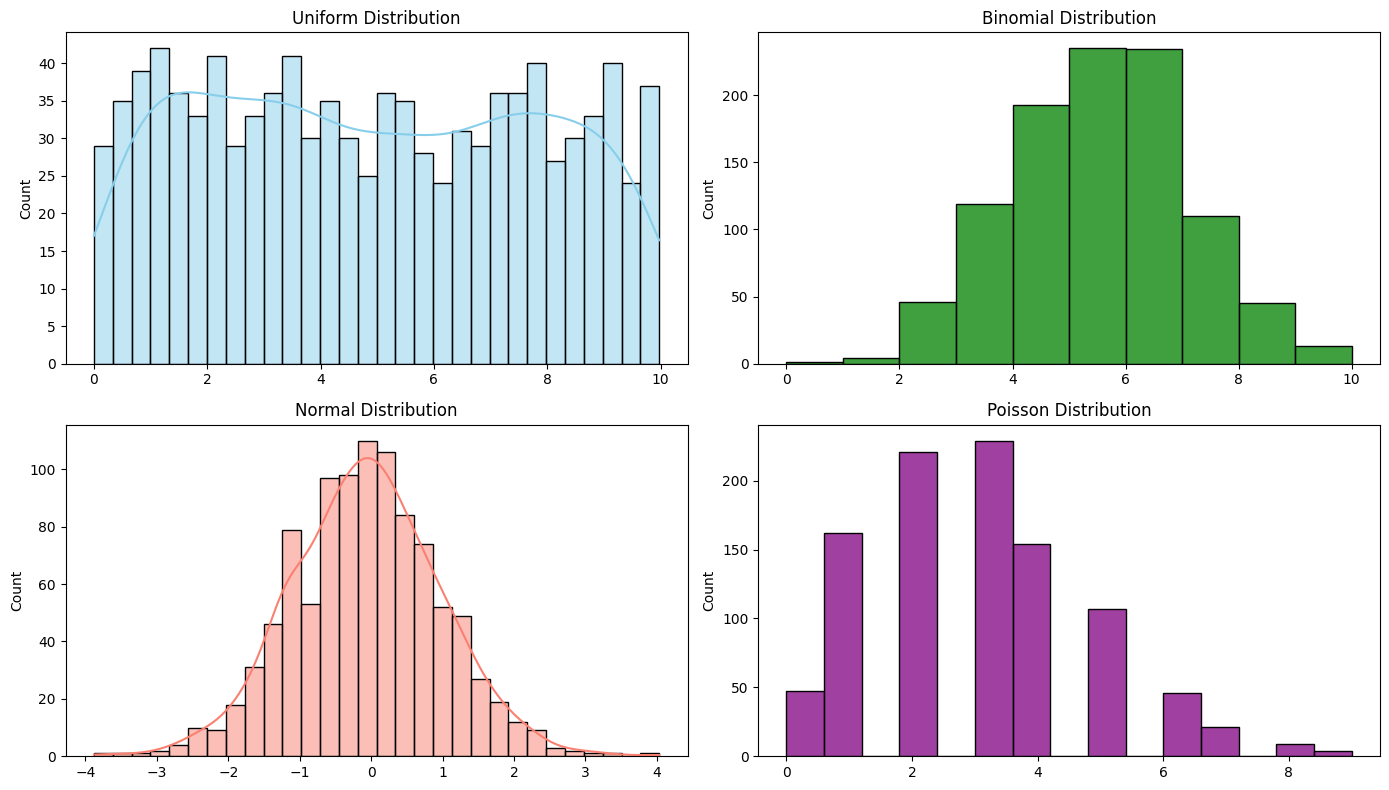

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(data_uniform, kde=True, bins=30, color='skyblue')
plt.title("Uniform Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data_binomial, kde=False, bins=10, color='green')
plt.title("Binomial Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data_normal, kde=True, bins=30, color='salmon')
plt.title("Normal Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data_poisson, kde=False, bins=15, color='purple')
plt.title("Poisson Distribution")

plt.tight_layout()
plt.show()

## Conclusion

Probability theory equips us with tools to reason under uncertainty:
- **Events and sample spaces** frame outcomes.
- **Permutations and combinations** model different arrangements and selections.
- **Conditional probability** and **Bayes' Theorem** are foundational to decision-making under uncertainty.
- **Distributions** help model real-world phenomena.

Using Python libraries such as `scipy.stats`, `numpy`, and `seaborn`, we can simulate and visualize these concepts efficiently.


## Real-Time Examples and Solutions


## Events and Sample Spaces
**Question:** A coin is flipped twice. What is the sample space, and what is the probability of getting exactly one head?

**Solution:**
Sample Space (S) = {HH, HT, TH, TT}  
Event E = {HT, TH} → exactly one head  
Number of favorable outcomes = 2  
Total outcomes = 4

$$
P(E) = \frac{2}{4} = 0.5
$$


## Permutations and Combinations
**Question:** In how many ways can 3 students be selected from a group of 5 to form a team (order does not matter)?

**Solution:**

Use combinations:

$$
C(5, 3) = \frac{5!}{3! \cdot 2!} = 10
$$


## Conditional Probability
**Question:** Suppose 70% of students passed Math, 60% passed English, and 50% passed both. What is the probability that a student passed Math given they passed English?

**Solution:**

Let A = passed Math, B = passed English  
Given:  
- P(A) = 0.7  
- P(B) = 0.6  
- P(A ∩ B) = 0.5  

Use conditional probability:

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{0.5}{0.6} \approx 0.833
$$


## Bayes' Theorem
**Question:** A test for a disease is 95% accurate. 1% of the population has the disease. What is the probability that a person has the disease given they test positive?

**Solution:**

Let:
- P(Disease) = 0.01
- P(Positive | Disease) = 0.95
- P(Positive | No Disease) = 0.05

Total probability of testing positive:

$$
P(Pos) = (0.95)(0.01) + (0.05)(0.99) = 0.0095 + 0.0495 = 0.059
$$

Apply Bayes:

$$
P(Disease | Pos) = \frac{0.95 \cdot 0.01}{0.059} \approx 0.161
$$

So, even with a positive test, the probability of actually having the disease is ~16.1%.


## Distributions
**Question:** A factory has a defect rate of 2%. In a batch of 100 items, what’s the probability that exactly 2 items are defective? Use the binomial distribution.

**Solution:**

Let X ~ Binomial(n = 100, p = 0.02)

Use binomial formula:

$$
P(X = 2) = C(100, 2) \cdot (0.02)^2 \cdot (0.98)^{98}
$$

Python can be used to compute this:


In [ ]:
from scipy.stats import binom

# Probability of exactly 2 defective items out of 100
n = 100
p = 0.02
k = 2
prob = binom.pmf(k, n, p)
print(f"P(X=2): {prob:.4f}")


**Question:** What does a normal distribution look like? Plot one with mean = 0 and std dev = 1.

**Python:**


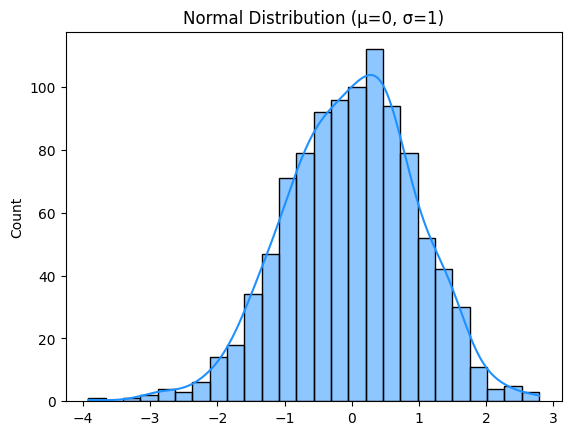

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = norm.rvs(loc=0, scale=1, size=1000)
sns.histplot(data, kde=True, color="dodgerblue")
plt.title("Normal Distribution (μ=0, σ=1)")
plt.show()


# **Hypothesis Testing in Data Science**

## Introduction

Hypothesis testing is a statistical method used to make decisions based on data. It allows us to evaluate assumptions (hypotheses) about population parameters using sample data.

In this notebook, we will cover:

- Null and alternative hypotheses
- t-test, chi-square test, and ANOVA
- p-values and significance levels
- Python implementation with real dataset examples


## Theory

### 1. Null and Alternative Hypotheses

- **Null Hypothesis (H₀):** A statement of no effect or no difference.
- **Alternative Hypothesis (H₁):** What you want to prove; a statement indicating an effect or difference.

For example:
- H₀: There is no difference in survival rates between male and female Titanic passengers.
- H₁: There is a difference in survival rates.

### 2. p-value

- The p-value tells us the probability of obtaining results as extreme as the observed ones, assuming H₀ is true.
- If **p-value < α (significance level, typically 0.05)**, we reject H₀.

### 3. Types of Tests

#### a. t-test
- Compares **means** of two groups.
- Assumes normality.
- Used for small samples.

#### b. Chi-square test (χ²)
- Compares **categorical** variables.
- Used to test independence or goodness of fit.

#### c. ANOVA (Analysis of Variance)
- Compares **means** across **3 or more** groups.
- Tests whether at least one group mean is different.


## Manual Example: t-Test

### Question:
A sample of 10 students taught using Method A had an average score of 72 with SD = 8.  
A second sample of 10 students taught using Method B had an average score of 65 with SD = 10.  
At α = 0.05, is there a significant difference?

### Hypotheses:
- H₀: μ₁ = μ₂ (no difference)
- H₁: μ₁ ≠ μ₂

### Test statistic:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
= \frac{72 - 65}{\sqrt{\frac{8^2}{10} + \frac{10^2}{10}}}
= \frac{7}{\sqrt{6.4 + 10}} = \frac{7}{\sqrt{16.4}} \approx \frac{7}{4.05} \approx 1.73
$$

Using degrees of freedom ≈ 18, critical t ≈ 2.101 → **Do not reject H₀**

****

*You compare the p-value to a significance level (usually 0.05).*

*If **p ≤ 0.05**, reject H₀ → There's evidence of a difference*

*If **p > 0.05**, do not reject H₀ → No strong evidence of a difference*


In [ ]:
# Python Implementation: t-Test (Manual)

import math

# Data
mean1, sd1, n1 = 72, 8, 10
mean2, sd2, n2 = 65, 10, 10

# t-test formula
numerator = mean1 - mean2
denominator = math.sqrt((sd1**2)/n1 + (sd2**2)/n2)
t_stat = numerator / denominator

print(f"Manual t-statistic: {t_stat:.2f}")


Manual t-statistic: 1.73


# Python Implementation: t-Test, Chi-square, ANOVA using SciPy

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df = sns.load_dataset('titanic').dropna(subset=['sex', 'survived'])

# t-Test: Are survival rates different between males and females?
male_survival = df[df['sex'] == 'male']['survived']
female_survival = df[df['sex'] == 'female']['survived']

t_stat, p_val = ttest_ind(male_survival, female_survival)
print(f"T-test p-value (Survival by Sex): {p_val:.90f}")


T-test p-value (Survival by Sex): 0.000000000000000000000000000000000000000000000000000000000000000000001406066130880259392461


In [ ]:
# Chi-Square Test of Independence: Survival and Class

contingency = pd.crosstab(df['survived'], df['class'])
chi2, p_val, dof, expected = chi2_contingency(contingency)
print(f"Chi-square p-value (Survival vs Class): {p_val:.90f}")


Chi-square p-value (Survival vs Class): 0.000000000000000000000045492517112987927181873490750489632676551464020787860810354677042894


# 📊 Integrated Data Analysis: A Real-World Case Study

## Introduction

In this notebook, we apply key statistical concepts to real datasets to simulate practical data-science scenarios. We cover:

1. **Descriptive Statistics** – Mean, median, mode, variance, etc.
2. **Probability** – Events, permutations, conditional, distributions.
3. **Hypothesis Testing** – t-test, chi-square, ANOVA.

Datasets used:
- **Titanic** (passenger data)
- **Iris** (flower measurements)
- **Custom simulated data** for demonstrating distributions

Let's begin!


# 1. 📈 Descriptive Statistics: Titanic Passenger Ages

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('titanic')
ages = df['age'].dropna()

# Compute measures
mean_age = ages.mean()
median_age = ages.median()
mode_age = ages.mode().iloc[0]
var_age = ages.var(ddof=0)
std_age = ages.std(ddof=0)
q1, q3 = ages.quantile([0.25, 0.75])
iqr_age = q3 - q1

print("Descriptive Statistics for Titanic Passenger Ages")
print("-------------------------------------------------")
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age:.2f}")
print(f"Variance: {var_age:.2f}")
print(f"Standard Deviation: {std_age:.2f}")
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR (Q3 - Q1): {iqr_age:.2f}")



Descriptive Statistics for Titanic Passenger Ages
-------------------------------------------------
Mean Age: 29.70
Median Age: 28.00
Mode Age: 24.00
Variance: 210.72
Standard Deviation: 14.52
Q1 (25th percentile): 20.12
Q3 (75th percentile): 38.00
IQR (Q3 - Q1): 17.88


**Interpretation:**
- Mean, median, and mode of passenger ages
- Variability via variance & standard deviation
- Q1, Q3, and IQR identify age dispersion and potential outliers


# 2. 🔢 Probability: Events & Conditional Probability

**Q1: Probability a randomly selected passenger is female AND survived?**

In [ ]:
# Define events
n = len(df)
event_female = df['sex'] == 'female'
event_survived = df['survived'] == 1
p_female = event_female.mean()
p_survived = event_survived.mean()
p_both = (event_female & event_survived).mean()
p_female_given_survived = p_both / p_survived

print("Probability Calculations")
print("------------------------")
print(f"P(Female): {p_female:.4f}")
print(f"P(Survived): {p_survived:.4f}")
print(f"P(Female and Survived): {p_both:.4f}")
print(f"P(Female | Survived): {p_female_given_survived:.4f}")



Probability Calculations
------------------------
P(Female): 0.3524
P(Survived): 0.3838
P(Female and Survived): 0.2615
P(Female | Survived): 0.6813


**Q2: In a group of 5 passengers, in how many ways can we choose 2 survivors?**

In [ ]:
import math

from itertools import combinations
survivors = df[df['survived'] == 1]
total_surv = len(survivors)

# Calculating combinations
comb = math.comb(total_surv, 2)
comb


58311

# 3. 🧪 Hypothesis Testing: Real-World Examples

## t-Test: Passenger Fare vs Survival

In [ ]:
from scipy.stats import ttest_ind

fare_survived = df[df['survived']==1]['fare'].dropna()
fare_died = df[df['survived']==0]['fare'].dropna()
t_stat, p_val = ttest_ind(fare_survived, fare_died)

print("T-Test Results")
print("--------------")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.20f}")



T-Test Results
--------------
T-statistic: 7.9392
P-value: 0.00000000000000612019


**Interpretation:** Very small p-value ⇒ reject H₀; survivors paid significantly different fares than non-survivors.


**B. Chi-square: Survival vs Class**

In [ ]:
cont = pd.crosstab(df['survived'], df['class'])
from scipy.stats import chi2_contingency

chi2, p_val_chi, *_ = chi2_contingency(cont)

print("Chi-square Results")
print("--------------")
print(f"Chi-square: {chi2:.4f}")
print(f"P-value: {p_val_chi:.90f}")


Chi-square Results
--------------
Chi-square: 102.8890
P-value: 0.000000000000000000000045492517112987927181873490750489632676551464020787860810354677042894
